In [124]:
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

In [125]:
in_layer = Input(shape=[784])
d1 = Dense(400, activation="sigmoid")(in_layer)
d2 = Dense(100, activation="sigmoid")(d1)
drop = Dropout(rate=0.2)(d2)
d3 = Dense(10, activation="softmax")(drop)

In [126]:
model = Model(in_layer, d3)

In [127]:
# model.summary()

In [128]:
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

In [129]:
mnist = pd.read_csv("../datasets/mnist_train_small.csv", header=None).values

X, y = mnist[:, 1:], mnist[:, :1]

ohe = OneHotEncoder(categories="auto")

y_hot = ohe.fit_transform(y).todense()

In [133]:
hist = model.fit(X, y_hot, batch_size=1000, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 46us/sample - loss: 1.8779 - accuracy: 0.4266 - val_loss: 1.3260 - val_accuracy: 0.6902
Epoch 2/10
16000/16000 [==============================] - 0s 20us/sample - loss: 1.1207 - accuracy: 0.7432 - val_loss: 0.8490 - val_accuracy: 0.8313
Epoch 3/10
16000/16000 [==============================] - 0s 27us/sample - loss: 0.7632 - accuracy: 0.8326 - val_loss: 0.6168 - val_accuracy: 0.8748
Epoch 4/10
16000/16000 [==============================] - 0s 26us/sample - loss: 0.5779 - accuracy: 0.8738 - val_loss: 0.4878 - val_accuracy: 0.8955
Epoch 5/10
16000/16000 [==============================] - 0s 27us/sample - loss: 0.4689 - accuracy: 0.8949 - val_loss: 0.4116 - val_accuracy: 0.9060
Epoch 6/10
16000/16000 [==============================] - 0s 24us/sample - loss: 0.4033 - accuracy: 0.9042 - val_loss: 0.3662 - val_accuracy: 0.9125
Epoch 7/10
16000/16000 [==============================] -

In [134]:
hist.history

{'loss': [1.8778664991259575,
  1.1207120642066002,
  0.7631940804421902,
  0.5778898186981678,
  0.46890585869550705,
  0.4033345468342304,
  0.3595088869333267,
  0.32346283085644245,
  0.29652678593993187,
  0.27580250333994627],
 'accuracy': [0.4265625,
  0.7431875,
  0.832625,
  0.8738125,
  0.894875,
  0.9041875,
  0.914375,
  0.921,
  0.9260625,
  0.9289375],
 'val_loss': [1.3260459899902344,
  0.8490144163370132,
  0.6167925298213959,
  0.4877718314528465,
  0.41163116693496704,
  0.3661910146474838,
  0.332920178771019,
  0.30967266112565994,
  0.29101990163326263,
  0.2724081948399544],
 'val_accuracy': [0.69025,
  0.83125,
  0.87475,
  0.8955,
  0.906,
  0.9125,
  0.91675,
  0.92025,
  0.92425,
  0.92775]}

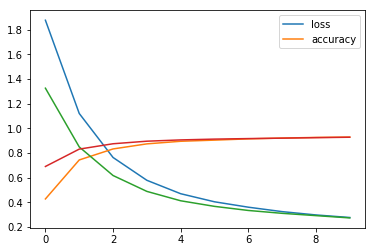

In [135]:
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["accuracy"], label = "accuracy")
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["val_accuracy"])
plt.legend()

In [136]:
from keras.preprocessing.image import load_img

img = load_img("../datasets/nums/seven.jpeg", target_size=(28, 28), grayscale=True)
np_img = np.array(img)
np_mod = (np_img < 100).astype(int)*255
model.predict(np_mod.reshape(1, 784)).argmax(axis=1)

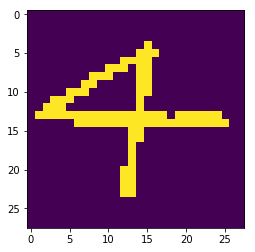

In [148]:
plt.imshow(np_mod)